# Salary Prediction

## Table of Contents
- [Introduction](#intro)
- [Part I - Descriptive Statistics](#descriptive)
- [Part II - Regression](#regression)
- [Part III - Interpret Results](#interpret)


<a id='intro'></a>
### Introduction

Linear Regression is very commonly performed by data analysts and data scientists.  For this project, you will be working to understand the results of a Linear Regression model associated with salaries.  Your goal is to work through this notebook to understand what variables are related to salary, and how exactly they are related.

As a final check, assure you meet all the criteria on the rubric.

<a id='descriptive'></a>
#### Part I - Descriptive Statistics

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import random
import matplotlib.pyplot as plt

random.seed(0)

`1.a)` Now, read in the `salary_data.csv` data. Store it in `df`. Read in the dataset and take a look at the top few rows here.

In [2]:
df = pd.read_csv('salary_data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


`b)` Use the below cell to find the number of rows in the dataset.

In [3]:
print(f'Number of rows in the dataset: {df.shape[0]}')

Number of rows in the dataset: 375


c) Do any of the rows have missing values?

If there are missing values, determine a method for dealing with them.

In [4]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [5]:
# 2 rows out of 375 have null values, so will drop the 2 rows with null values
df.dropna(inplace=True) 

In [6]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [7]:
print(f'Number of rows in the dataset: {df.shape[0]}')

Number of rows in the dataset: 373


`d)` How many employees are in each `Education Level`? Build a bar chart to show the count of employees in each level.

In [8]:
df['Education Level'].value_counts()

Education Level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64

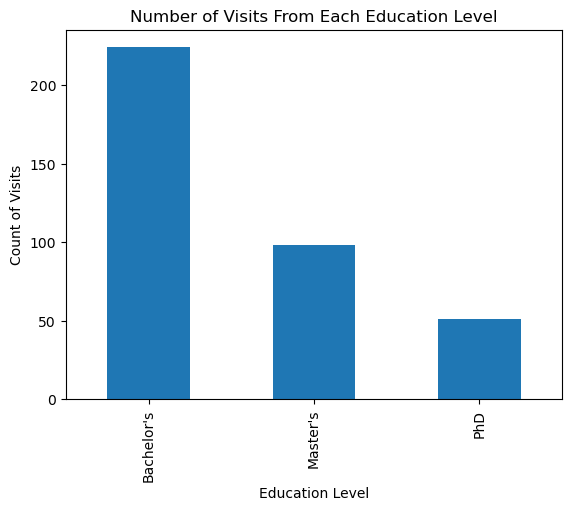

In [9]:
# bar chart of results
df['Education Level'].value_counts().plot(kind='bar');
plt.title('Number of Visits From Each Education Level');
plt.ylabel('Count of Visits');
plt.show();

`e)` What are the possible values for `Salary`?  What does the distribution of `Salary` look like?

In [10]:
df['Salary'].value_counts()

Salary
40000.0     31
50000.0     22
95000.0     22
180000.0    20
120000.0    20
90000.0     18
150000.0    18
45000.0     18
160000.0    17
60000.0     17
110000.0    17
170000.0    16
130000.0    14
100000.0    14
140000.0    14
35000.0     13
80000.0     12
55000.0     10
85000.0     10
70000.0      9
65000.0      9
105000.0     6
190000.0     4
75000.0      4
115000.0     3
250000.0     2
200000.0     2
135000.0     2
175000.0     2
125000.0     1
30000.0      1
220000.0     1
185000.0     1
145000.0     1
155000.0     1
350.0        1
Name: count, dtype: int64

In [11]:
print(f'Maximum Salary in Dataset: {df['Salary'].max()}')

Maximum Salary in Dataset: 250000.0


In [12]:
print(f'Minimum Salary in Dataset: {df['Salary'].min()}')

Minimum Salary in Dataset: 350.0


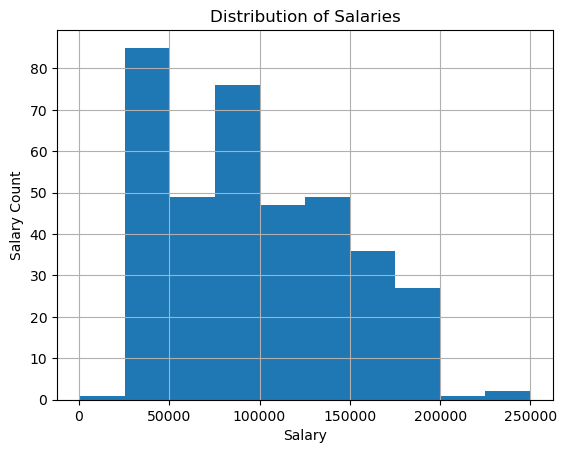

In [13]:
df['Salary'].hist();
plt.title('Distribution of Salaries');
plt.ylabel('Salary Count');
plt.xlabel('Salary');
plt.show();

<a id='regression'></a>
#### Part II - Regression

`1.` Now that you have had a chance to learn more about the dataset, let's look more at how different factors are related to `Salary`.

`a)` Consider average salary by gender, is there evidence that salaries are higher for one gender over the other?

In [14]:
df.groupby('Gender')['Salary'].mean()

Gender
Female     97011.173184
Male      103867.783505
Name: Salary, dtype: float64

The analysis showed Gender Male has a higher average salary (103,867) than Gender Female (97,011), which is evidence of a difference.

`b)` Consider average salary by education level, is there evidence that salaries are higher for increased education?

In [15]:
df.groupby('Education Level')['Salary'].mean()

Education Level
Bachelor's     74756.026786
Master's      129795.918367
PhD           157843.137255
Name: Salary, dtype: float64

The analysis showed PhD (157,843) has a higher average that Master's (129,795), which in turn was a higher average than Bachelor's (74,756).  This is evidence that salaries are higher for increased education.

`c)` Consider average salary by years of experience, is there evidence that salaries are associated with increased years of experience?

In [16]:
df.groupby('Years of Experience')['Salary'].mean()

Years of Experience
0.0      33333.333333
0.5      35000.000000
1.0      37857.142857
1.5      36279.166667
2.0      41774.193548
3.0      51166.666667
4.0      58500.000000
5.0      64117.647059
6.0      83750.000000
7.0      84444.444444
8.0      88800.000000
9.0     101818.181818
10.0    100555.555556
11.0    100500.000000
12.0    105000.000000
13.0    120000.000000
14.0    125769.230769
15.0    134375.000000
16.0    157500.000000
17.0    143000.000000
18.0    149615.384615
19.0    166333.333333
20.0    168846.153846
21.0    173846.153846
22.0    162222.222222
23.0    177500.000000
24.0    250000.000000
25.0    200000.000000
Name: Salary, dtype: float64

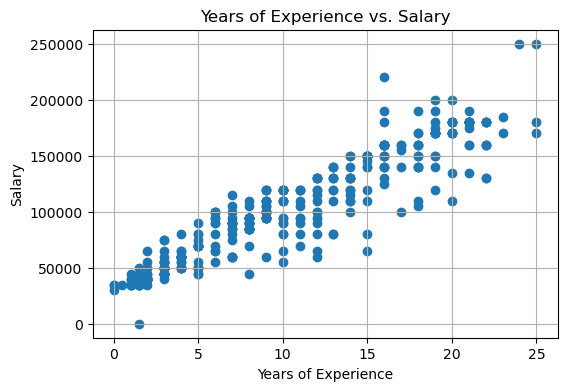

In [17]:
plt.figure(figsize=(6, 4))
plt.scatter(df['Years of Experience'], df['Salary'])
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Years of Experience vs. Salary")
plt.grid(True)
plt.show()

The graph and data above show that (in general) salaries increase as the number of years experience increase.  This is evidence that salaries are associated with increased years of experience

`d)`  To make use of Job Title column, let's create a bool flag based on word existence

List of words: 

* Director
* Junior
* Senior
* Manager
* Analyst
* Engineer


In [18]:
flag_words = ['director', 'junior', 'senior', 'manager', 'analyst', 'engineer']
df['Job Title'] = df['Job Title'].str.lower()

for word in flag_words:
    df['is_' + word] = df['Job Title'].str.contains(word).astype(int)
    
df = df.drop('Job Title', axis=1)

`e)` Create a flag for gender where 1 is if a person is male and 0 if the person is not.

In [19]:
gender_male = pd.get_dummies(df[['Gender']], drop_first=True).astype(int)
df = df.join(gender_male)
df = df.drop('Gender', axis=1)
df.head()

,Age,Education Level,Years of Experience,Salary,is_director,is_junior,is_senior,is_manager,is_analyst,is_engineer,Gender_Male
0,32.0,Bachelor's,5.0,90000.0,0,0,0,0,0,1,1
1,28.0,Master's,3.0,65000.0,0,0,0,0,1,0,0
2,45.0,PhD,15.0,150000.0,0,0,1,1,0,0,1
3,36.0,Bachelor's,7.0,60000.0,0,0,0,0,0,0,0
4,52.0,Master's,20.0,200000.0,1,0,0,0,0,0,1


In [20]:
# do the same as above for Education Level
ed_level = pd.get_dummies(df[['Education Level']], drop_first=True).astype(int)
df = df.join(ed_level)
df = df.drop('Education Level', axis=1)
df.head()

,Age,Years of Experience,Salary,is_director,is_junior,is_senior,is_manager,is_analyst,is_engineer,Gender_Male,Education Level_Master's,Education Level_PhD
0,32.0,5.0,90000.0,0,0,0,0,0,1,1,0,0
1,28.0,3.0,65000.0,0,0,0,0,1,0,0,1,0
2,45.0,15.0,150000.0,0,0,1,1,0,0,1,0,1
3,36.0,7.0,60000.0,0,0,0,0,0,0,0,0,0
4,52.0,20.0,200000.0,1,0,0,0,0,0,1,1,0


`f)` Use statsmodels to fit a linear model to predict salary using each of the features from `a-e`.  These include:
* Gender
* Job TItle
* Years of Experience
* Education

In [21]:
df['intercept'] = 1

y = df['Salary']
X = df[['intercept', 'Gender_Male', 'is_director', 'is_junior',
        'is_senior', 'is_manager', 'is_analyst', 'is_engineer',
        'Years of Experience', "Education Level_Master's", 'Education Level_PhD']]

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     391.7
Date:                Thu, 11 Dec 2025   Prob (F-statistic):          2.41e-187
Time:                        20:56:42   Log-Likelihood:                -4090.6
No. Observations:                 373   AIC:                             8203.
Df Residuals:                     362   BIC:                             8246.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
intercept               

<a id='interpretation'></a>
### Part III - Interpret Results

`1.` Consider you are tasked with finding which features in your linear model are significantly related to salary.  Were there any features that were not significantly related to salary in your first model?  If not, remove those features and fit a new model.  Only keep the features that were significant from the original model.

In [22]:
# dropped columns:  is_junior, is_analyst, is_engineer (all 3 were not significantly related to salary)

df['intercept'] = 1

y = df['Salary']
X = df[['intercept', 'Gender_Male', 'is_director', 'is_senior', 'is_manager',
        'Years of Experience', "Education Level_Master's", 'Education Level_PhD']]

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     557.4
Date:                Thu, 11 Dec 2025   Prob (F-statistic):          1.46e-190
Time:                        20:56:42   Log-Likelihood:                -4092.6
No. Observations:                 373   AIC:                             8201.
Df Residuals:                     365   BIC:                             8233.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
intercept               

### The next section refers to the OLS Regression Results shown directly above

`a)` With each additional year of experience, what is the expected change in salary?  What is the 95% confidence interval of the change?

Expected change in salary with an additional year of experience:  5,104.43

95% Confidence Interval of the Change: 4,755.927 -
5,452.950

`b)` What is the expected difference in salary between someone with a senior title and someone with none of the other title indications?

The expected salary difference for an individual with the is_senior title compared to the baseline: 14,450

`c)` What is the expected difference in salary between someone with a PhD and an individual with no PhD nor master's degree?  What is the 95% confidence interval of the change?

The expected difference in salary: 23,080

The 95% confidence interval for this change:  17,700 - 28,500

`d)` If a male employee has 5 years of experience as a senior engineer with a bachelor's degree, what is the expected salary of the employee?

Expected Salary Calculation:

Expected Salary = Intercept + Gender_Male Coefficient + is_senior Coefficient + (5 * Years of Experience Coefficient)

28760 + 7629.65 + 14450 + (5 * 5104.44) = 76361.85

The Expected Salary is 76,361.85

`e)` Imagine that the employee in question `d)` actually has a salary of $110,000, what would the residual be for this employee?

Residual = Actual Salary - Predicted Salary

Residual = 110,000 - 76,361.85 = 33,638.15

The Residual for this employee is 33,638.15

`f)` How well do you think your model fits?  What metrics or plots would you consider to understand if this model does a good job of predicting salary?

#### The OLS Summary provides evidence that the model is a good fit.

- The R-squared Value: The R-squared value is high at 0.914. The adjusted R-squared value to account for the number of predictors used is similar at 0.913. A high R-squared value suggests a good fit because it indicates that a large proportion of the variability of the dependent variable of Salary is accounted for by the model.  It is also a good sign that the R-squared did not change much when removing insignificant variables from the first to second model (0.915 to 0.914).

- The p-values for the coefficients:  The coefficients for the independent variables all have p-values < 0.05 (all are 0.00, except is_manager which is 0.019).  This shows that these variables are statisctically significant in contributing to the fit of the model.

- The plot below shows how close the model’s predictions are to the actual observed data in the original dataframe.
Most of the points cluster around the diagonal line, showing that the model is a good fit.

#### The OLS Summary also suggests a problem with the model violating assumptions

- The high Omnibus (126.635) and Jarque-Bera (JB) (1010.895) statistics, and the high Skew (1.196) and Kurtosis (10.702) mean that the residuals are not normally distributed.  This suggests the model may be biased or a different model or transformation may be needed.  

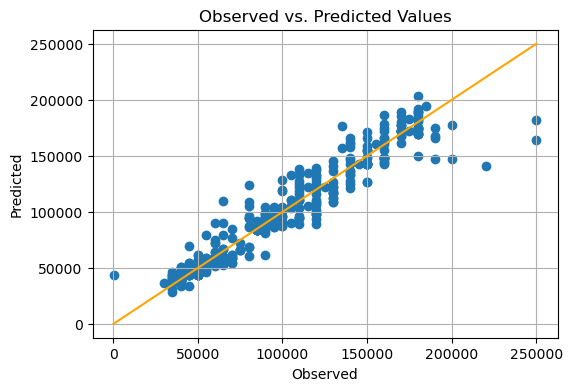

In [23]:
# get predicted values from model
predicted = model.predict()

# plot observed salaries vs the salaries predicted by the model
plt.figure(figsize=(6, 4))
plt.scatter(y, predicted)
# add diagonal line
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='orange')
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.title("Observed vs. Predicted Values")
plt.grid(True)
plt.show()